Chapter 13

# 特征值分解中的复数现象
Book_4《矩阵力量》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码展示了矩阵 $A$ 对二维平面上一组初始点的逐步旋转缩放变换效果。矩阵 $A$ 是通过旋转矩阵 $R$ 和缩放矩阵 $S$ 相乘得到的，其中旋转角度 $\theta$ 为 $30^\circ$，缩放因子 $r = 0.8$。因此，矩阵 $A = R \times S$ 同时包含了旋转和平缩操作，即在每次变换时，对点进行 $30^\circ$ 的顺时针旋转，并将其缩小至原来的 $80\%$。

代码具体过程如下：

1. **生成初始点**：在极坐标系中生成了 18 个初始点，这些点均匀分布在以原点为圆心、半径为 5 的圆周上，角度范围为 $[0, 2\pi]$，用来观察不同方向上的旋转缩放变换效果。
  
2. **迭代应用变换**：对每个初始点，将矩阵 $A$ 反复应用 20 次，记录每次变换后的坐标，生成螺旋状的收缩轨迹。对于初始点 $\vec{x}_0$，其经过 $k$ 次变换后的坐标为：

   $$
   \vec{x}_k = A^k \vec{x}_0
   $$

   每次变换后，点沿 $30^\circ$ 旋转并缩小，逐步向原点收缩，最终形成一条螺旋收缩的轨迹。

3. **可视化**：在平面上绘制每个初始点的轨迹，用彩虹色标记每条轨迹的颜色，以便于区分。初始点用较大的“$\times$”标记，轨迹上的点则用小圆点显示。为了便于观察，设置图形坐标轴比例相等，隐藏边框，仅保留 $x$ 和 $y$ 轴，使得螺旋收缩的几何效果更加清晰。

最终，代码展示了旋转缩放矩阵 $A$ 的作用：每个点在旋转的同时逐步向原点收缩，呈现出一个彩色螺旋图案。

In [1]:
import numpy as np  # 导入数值计算库
import matplotlib.pyplot as plt  # 导入绘图库

## 定义旋转和缩放参数

In [2]:
theta = np.deg2rad(30)  # 旋转角度，单位为弧度
r = 0.8  # 缩放因子

## 定义旋转矩阵 R 和缩放矩阵 S

In [3]:
R = np.array([[np.cos(theta), -np.sin(theta)],  # 旋转矩阵
              [np.sin(theta),  np.cos(theta)]])

In [4]:
S = np.array([[r, 0],  # 缩放矩阵
              [0, r]])

In [5]:
A = R @ S  # 变换矩阵 A，由旋转矩阵和缩放矩阵相乘得到

## 计算特征值和特征向量

In [6]:
Lamb, V = np.linalg.eig(A)  # 特征值分解

In [7]:
Lamb

array([0.69282032+0.4j, 0.69282032-0.4j])

In [8]:
V 

array([[ 0.        -0.70710678j,  0.        +0.70710678j],
       [-0.70710678+0.j        , -0.70710678-0.j        ]])

## 创建初始点的角度数组

In [9]:
theta_array = np.arange(0, np.pi * 2, np.pi * 2 / 18)  # 用于生成初始点位置的角度数组

## 定义颜色

In [10]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(theta_array)))  # 定义彩虹色谱

## 绘制初始点及其轨迹

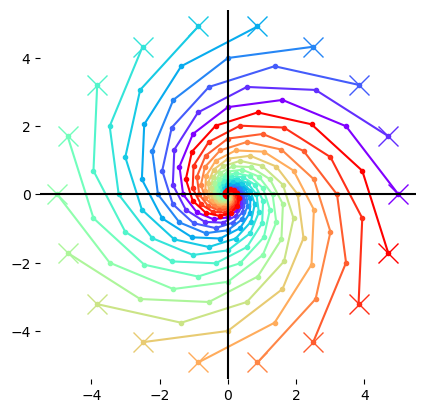

In [11]:
fig, ax = plt.subplots()

for j, theta_i in enumerate(theta_array):
    x = np.array([[5 * np.cos(theta_i)],  # 生成初始点的坐标
                  [5 * np.sin(theta_i)]])
    
    plt.plot(x[0], x[1],  # 绘制初始点
             marker='x', color=colors[j], 
             markersize=15)

    x_array = x  # 初始化轨迹数组

    for i in np.arange(20):  # 迭代应用矩阵 A
        x = A @ x  # 通过 A 变换
        x_array = np.column_stack((x_array, x))  # 更新轨迹数组

    plt.plot(x_array[0, :], x_array[1, :],  # 绘制变换轨迹
             marker='.', color=colors[j])

plt.axis('scaled')  # 设置坐标轴比例

ax.spines['top'].set_visible(False)  # 隐藏顶部边框
ax.spines['right'].set_visible(False)  # 隐藏右侧边框
ax.spines['bottom'].set_visible(False)  # 隐藏底部边框
ax.spines['left'].set_visible(False)  # 隐藏左侧边框
ax.axvline(x=0, color='k')  # 添加 x 轴
ax.axhline(y=0, color='k')  # 添加 y 轴